# DECISION TREE

In [1]:
import pandas as pd

## Loading the Dataset

In [2]:
df = pd.read_csv("Pokemon.csv")
df.head(10)

,Sr.No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


## Dividing data into target variable and independent variable

In [3]:
inputs = df.drop('Legendary', axis='columns')
target = df['Legendary']

In [4]:
inputs

,Sr.No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
794,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6
795,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6
796,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6
797,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6


In [5]:
target

0      False
1      False
2      False
3      False
4      False
       ...  
794     True
795     True
796     True
797     True
798     True
Name: Legendary, Length: 799, dtype: bool

## Label Encoding

Machine Learning algorithms can only work on numbers they cannot understand labels, so we will convert the labels into numbers and for that we'll use label encoders.


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_name = LabelEncoder()
le_type1 = LabelEncoder()
le_type2 = LabelEncoder()

In [8]:
inputs['name_n'] = le_name.fit_transform(inputs['Name'])
inputs['type1_n'] = le_type1.fit_transform(inputs['Type 1'])
inputs['type2_n'] = le_type2.fit_transform(inputs['Type 2'])
inputs.head(10)

,Sr.No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_n,type1_n,type2_n
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,80,9,13
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,328,9,13
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,743,9,13
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,744,9,13
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,102,6,18
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,103,6,18
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,99,6,7
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,100,6,2
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,101,6,7
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,663,17,18


In [9]:
# Dropping label columns
inputs_n = inputs.drop(['Sr.No.','Name', 'Type 1', 'Type 2'], axis='columns')
inputs_n

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_n,type1_n,type2_n
0,318,45,49,49,65,65,45,1,80,9,13
1,405,60,62,63,80,80,60,1,328,9,13
2,525,80,82,83,100,100,80,1,743,9,13
3,625,80,100,123,122,120,80,1,744,9,13
4,309,39,52,43,60,50,65,1,102,6,18
...,...,...,...,...,...,...,...,...,...,...,...
794,600,50,100,150,100,150,50,6,160,15,4
795,700,50,160,110,160,110,110,6,161,15,4
796,600,80,110,60,150,130,70,6,313,14,8
797,680,80,160,60,170,130,80,6,314,14,1


## Making A Decision Tree

In [10]:
from sklearn import tree

In [11]:
model = tree.DecisionTreeClassifier()

In [13]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [14]:
model.score(inputs_n,target)

1.0

In [19]:
model.predict([[318,45,49,49,65,65,45,1,80,9,13]])

C:\Users\JD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([False])

## Plotting Decision Tree

In [20]:
from matplotlib import pyplot as plt

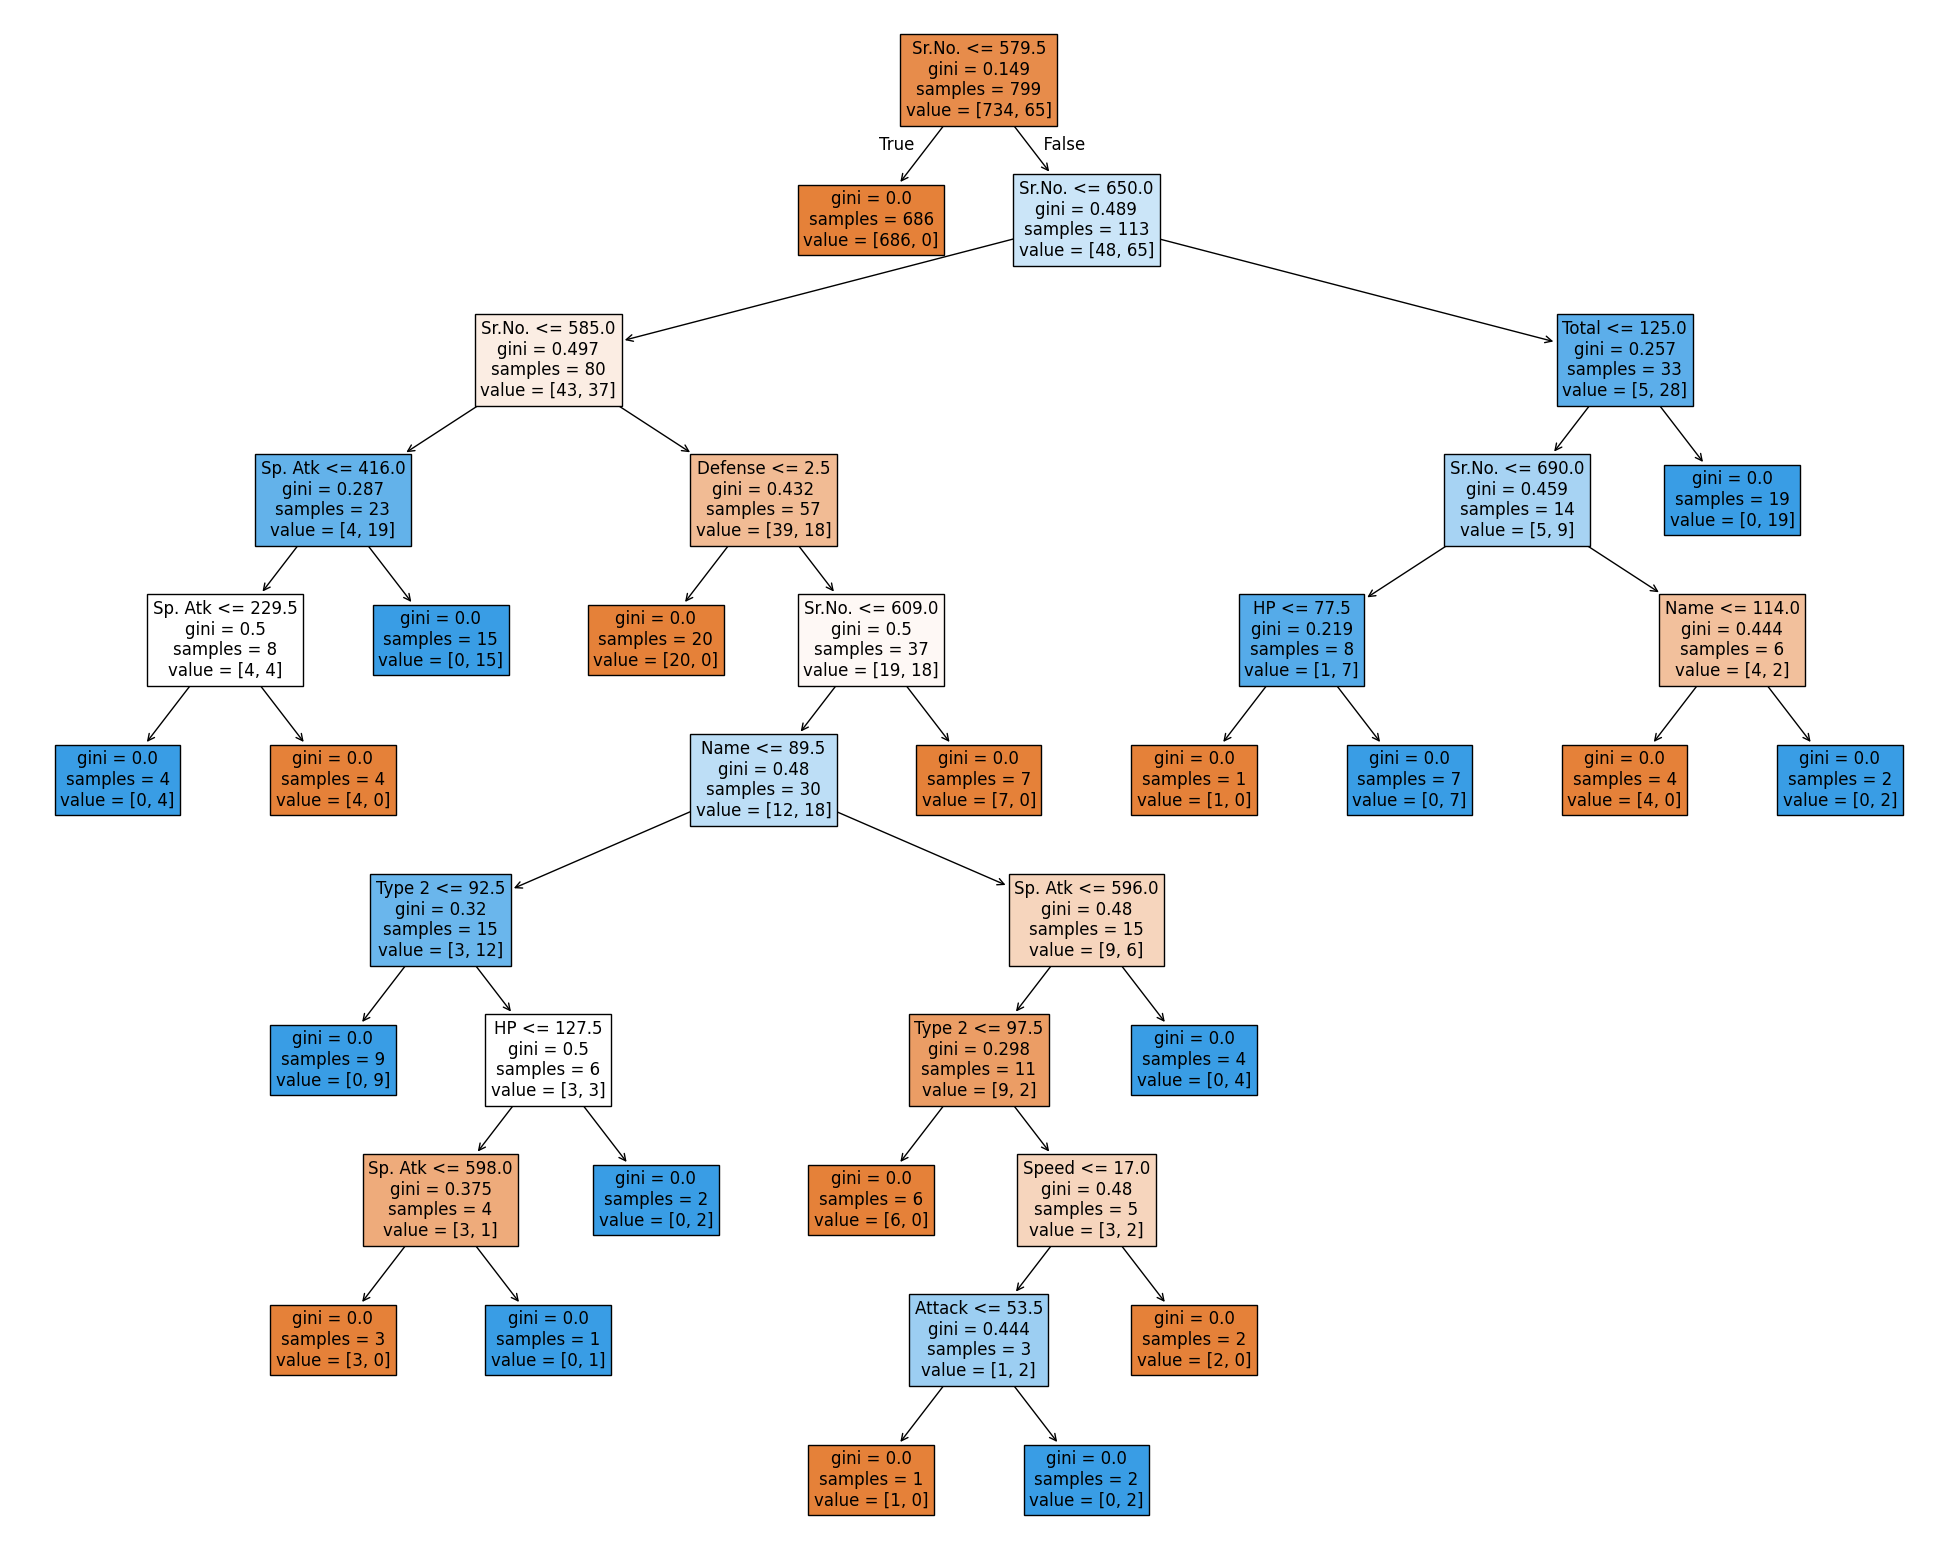

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model ,
                   feature_names = df.columns,
                   filled=True,
                   fontsize=12)